In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def create_x_kernel(sigma_value):
  kernel_size = 7
  # create a kernel of kernel_size
  kernel = np.zeros((kernel_size,kernel_size),dtype=np.float32)
  kernel_height,kernel_width = kernel.shape
  # finding the center of the kernel
  center_x = kernel_height // 2
  center_y = kernel_width // 2
    
    # Put the value in (x,y) position on the basis of the Gaussian Smoothing Filter
  for x in range(kernel_height):
    for y in range(kernel_width):
      # finding the distance between the center to a particular element
      dx = x - center_x
      dy = y - center_y
      exponential_value = -((dx**2 + dy**2) / (2 * sigma_value**2))  # Fixed formula
      gaussian_value = (1 / (2 * np.pi * sigma_value**2)) * np.exp(exponential_value)
      value = (-dx/sigma_value**2)*gaussian_value
      kernel[x, y] = value
  
  # kernel = kernel / np.sum(kernel)
  # print(kernel)
  return kernel

In [38]:
def create_y_kernel(sigma_value):
  kernel_size = (7*sigma_value + 1)
  # create a kernel of kernel_size
  kernel = np.zeros((kernel_size,kernel_size),dtype=np.float32)
  kernel_height,kernel_width = kernel.shape
  # finding the center of the kernel
  center_x = kernel_height // 2
  center_y = kernel_width // 2
    
    # Put the value in (x,y) position on the basis of the Gaussian Smoothing Filter
  for x in range(kernel_height):
    for y in range(kernel_width):
      # finding the distance between the center to a particular element
      dx = x - center_x
      dy = y - center_y
      exponential_value = -((dx**2 + dy**2) / (2 * sigma_value**2))  # Fixed formula
      gaussian_value = (1 / (2 * np.pi * sigma_value**2)) * np.exp(exponential_value)
      value = (-dy/sigma_value**2)*gaussian_value
      kernel[x, y] = value
  
  # kernel = kernel / np.sum(kernel)
  return kernel

In [39]:
def threshold(image):
  height,width = image.shape
  thresholded_image = np.zeros((height,width),dtype=np.uint8)
  for x in range(height):
    for y in range(width):
      if(image[x,y] >= 128):
        thresholded_image[x,y] = 255
      elif(image[x,y]< 128 and image[x,y] >= 56):
        thresholded_image[x,y] = 128
      else:
        thresholded_image[x,y] = 0
  return thresholded_image

In [40]:
def hysteresis_threshold(image,lowThreshold,highThreshold):
  height,width = image.shape
  thresholded_image = np.zeros((height,width),dtype=np.uint8)
  for x in range(1,height-1):
    for y in range(1,width-1):
      if(image[x,y] >= highThreshold):
        image[x,y] = 255
      elif(image[x,y] <= lowThreshold):
        image[x,y] = 0
      else:
        if((image[x-1,y-1]>=highThreshold) or (image[x-1,y]>=highThreshold) or (image[x-1,y+1]>=highThreshold)
          or (image[x,y-1]>=highThreshold) or (image[x,y+1]>=highThreshold)
          or (image[x+1,y-1]>=highThreshold) or (image[x+1,y]>=highThreshold) or (image[x+1,y+1]>=highThreshold)):
          image[x,y] = 255
        else:
          image[x,y] = 0
  return image

In [41]:
original_image = cv2.imread("../../data/Lena.jpg",cv2.IMREAD_GRAYSCALE)

# Now create the kernel by passing the sigma value
x_kernel = create_x_kernel(sigma_value=1)
y_kernel = create_y_kernel(sigma_value=1)

# After creating the kernels convolve the image with those kernels
convolved_x_image = cv2.filter2D(original_image,cv2.CV_32F,x_kernel)
convolved_y_image = cv2.filter2D(original_image,cv2.CV_32F,y_kernel)

accumulated_image = cv2.magnitude(convolved_x_image,convolved_y_image)



# roundeing the image for showing purpose
normed_x_image = np.round(cv2.normalize(convolved_x_image, None, 0, 255, cv2.NORM_MINMAX)).astype(np.uint8)
normed_y_image = np.round(cv2.normalize(convolved_y_image, None, 0, 255, cv2.NORM_MINMAX)).astype(np.uint8)
normed_accumulated_image = np.round(cv2.normalize(accumulated_image, None, 0, 255, cv2.NORM_MINMAX)).astype(np.uint8)
# cv2.imshow("Convolved at x-axis",normed_x_image)
# cv2.imshow("Convolved at y-axis",normed_y_image)


cv2.imshow("Original Image",original_image)

# finding the gradient magnitude of them
last_image = threshold(normed_accumulated_image)
cv2.imshow("Convolved accumulated image after double thresholding",last_image)
hysteresis_threshold_image = hysteresis_threshold(last_image,lowThreshold=56,highThreshold=128)
# x_kernel = np.round(cv2.normalize(x_kernel, None, -254, 255, cv2.NORM_MINMAX)).astype(np.int8)

# cv2.imshow("Convolved accumulated image",normed_accumulated_image)

# print("x kernel is",x_kernel)
# print("y kernel is",y_kernel)
# show the original image

cv2.imshow("Hysteresis Threshold Image",hysteresis_threshold_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

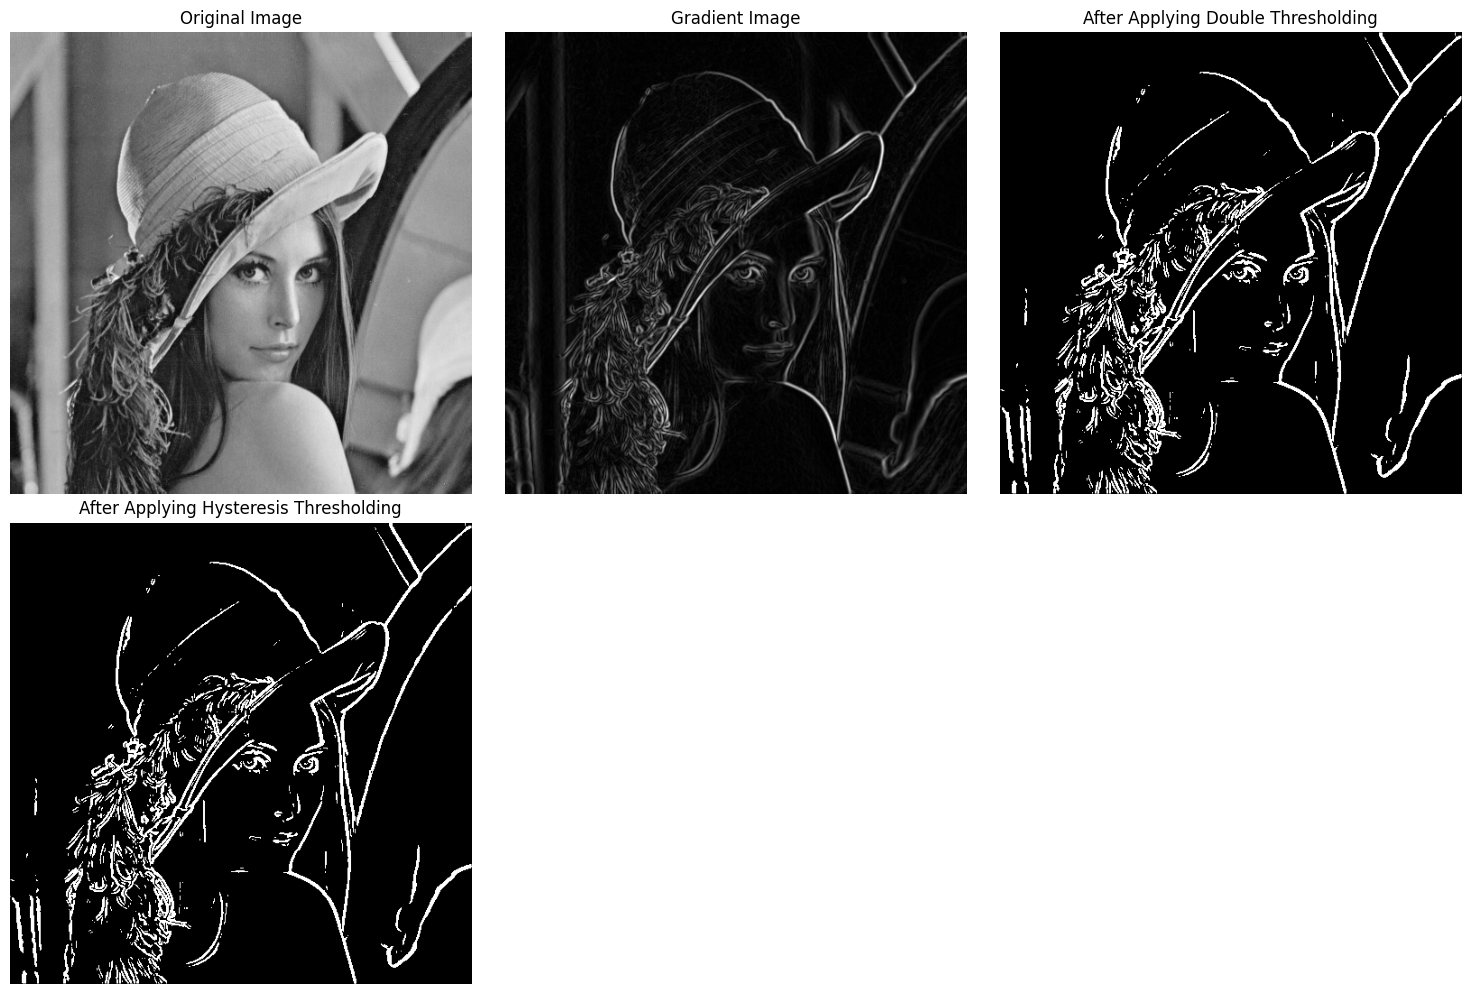

In [42]:
images = [
    
    (original_image, "Original Image"),
    (normed_accumulated_image, "Gradient Image"),
    (last_image, "After Applying Double Thresholding"),
    (hysteresis_threshold_image, "After Applying Hysteresis Thresholding"),
]


# Make a grid: 3 columns, enough rows for all images
cols = 3
rows = (len(images) + cols - 1) // cols  # ceiling division
fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))

axes = axes.flatten()  # flatten into 1D for easy iteration

for ax, (img, title) in zip(axes, images):
    ax.imshow(img, cmap="gray")
    ax.set_title(title, fontsize=12)
    ax.axis("off")

# Hide any extra axes (if total slots > number of images)
for ax in axes[len(images):]:
    ax.axis("off")

plt.tight_layout()
plt.show()
